# **Libraries and Packages Imported**

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# **Data Preprocessing**

In [48]:
# Load the dataset
file_path = '/content/customer_shopping_data.csv'
data = pd.read_csv(file_path)
print(data.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  


In [49]:
# Track whether any missing values are found
missing_values_found = False

# Check for missing values and fill them with mean for numeric and mode for non-numeric columns
for column in data.columns:
    if data[column].isnull().any():
        missing_values_found = True
        print(f"Missing values detected in '{column}'.", end=" ")
        if data[column].dtype in ['float64', 'int64']:  # Numeric column
            print("Filling missing values with the mean...")
            data[column].fillna(data[column].mean(), inplace=True)
        else:  # Non-numeric column
            print("Filling missing values with the mode...")
            data[column].fillna(data[column].mode()[0], inplace=True)

# If no missing values were found, print a message
if not missing_values_found:
    print("No missing values found.")

No missing values found.


In [50]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
if duplicate_rows.any():
    print(f"{duplicate_rows.sum()} duplicate rows detected. Removing duplicates...")
    data = data.drop_duplicates()
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [51]:
# Display the final table
print(data)

      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoic

# **EDA**

**Corelation Matrix**

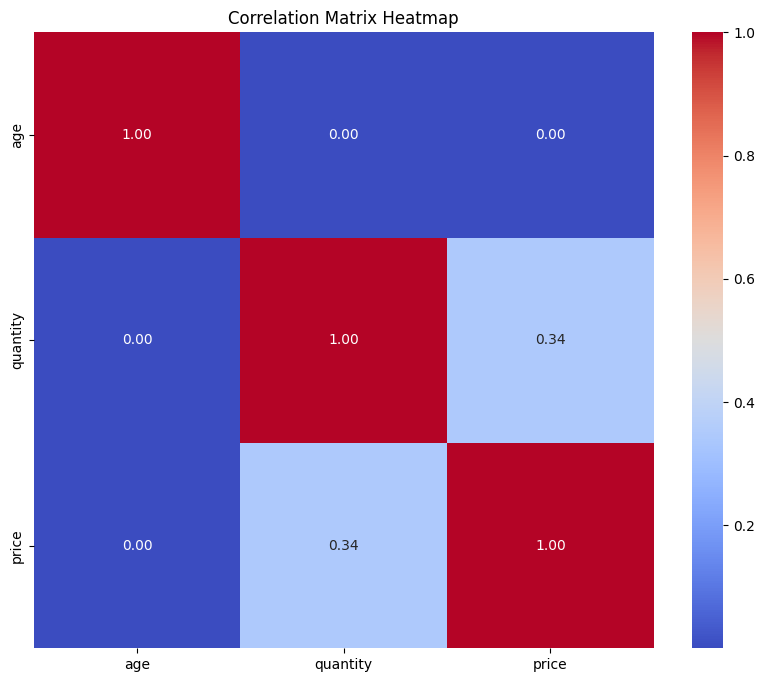

In [52]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Distribution Plots for Numeric Columns**

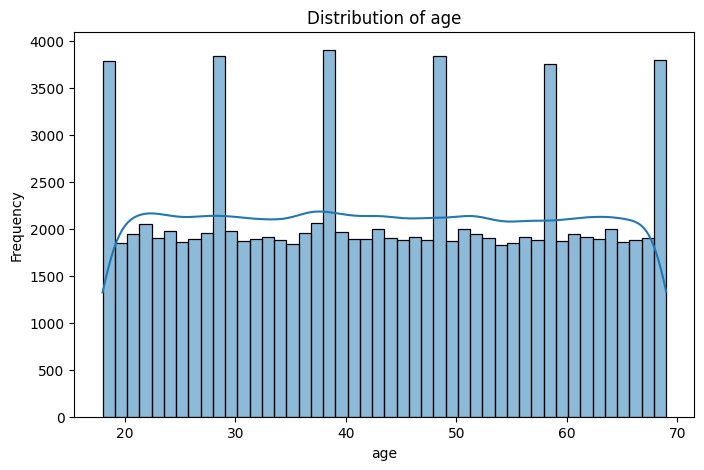

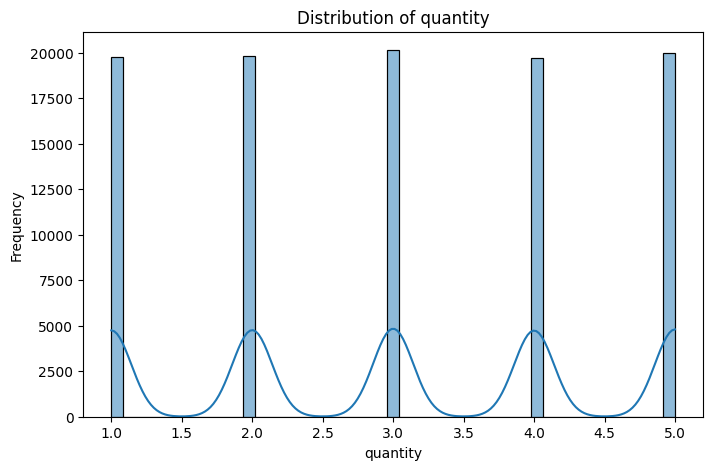

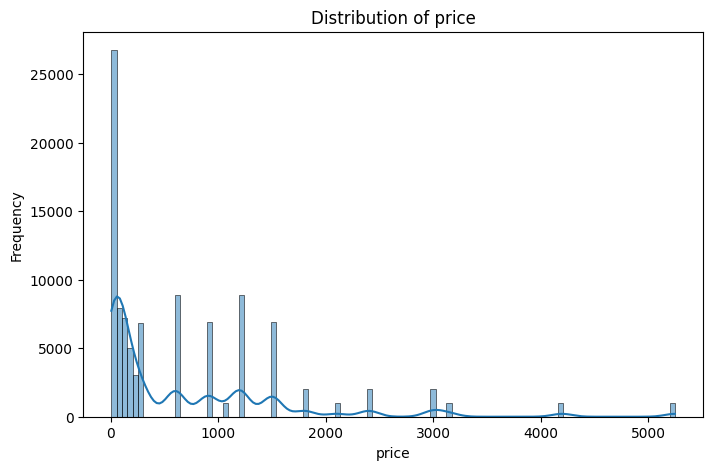

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numeric columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



**Quantity distribution by payment method**

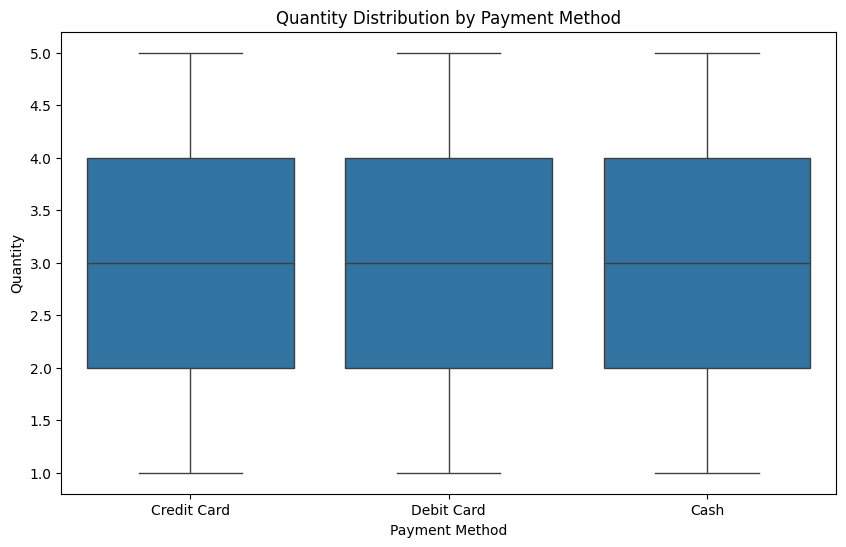

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='payment_method', y='quantity')
plt.title('Quantity Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Quantity')
plt.show()


**Average Price by Category**

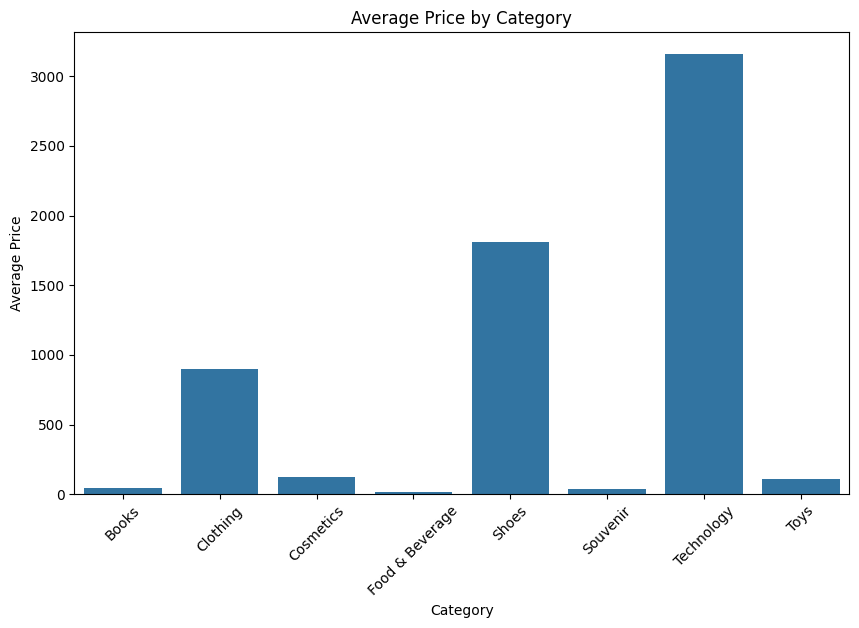

In [55]:
# Calculate the average price by category
average_price_by_category = data.groupby('category')['price'].mean()

# Plotting the average price by category
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_category.index, y=average_price_by_category.values)
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


**Total Price By Payment Method And Category**

<Figure size 1400x800 with 0 Axes>

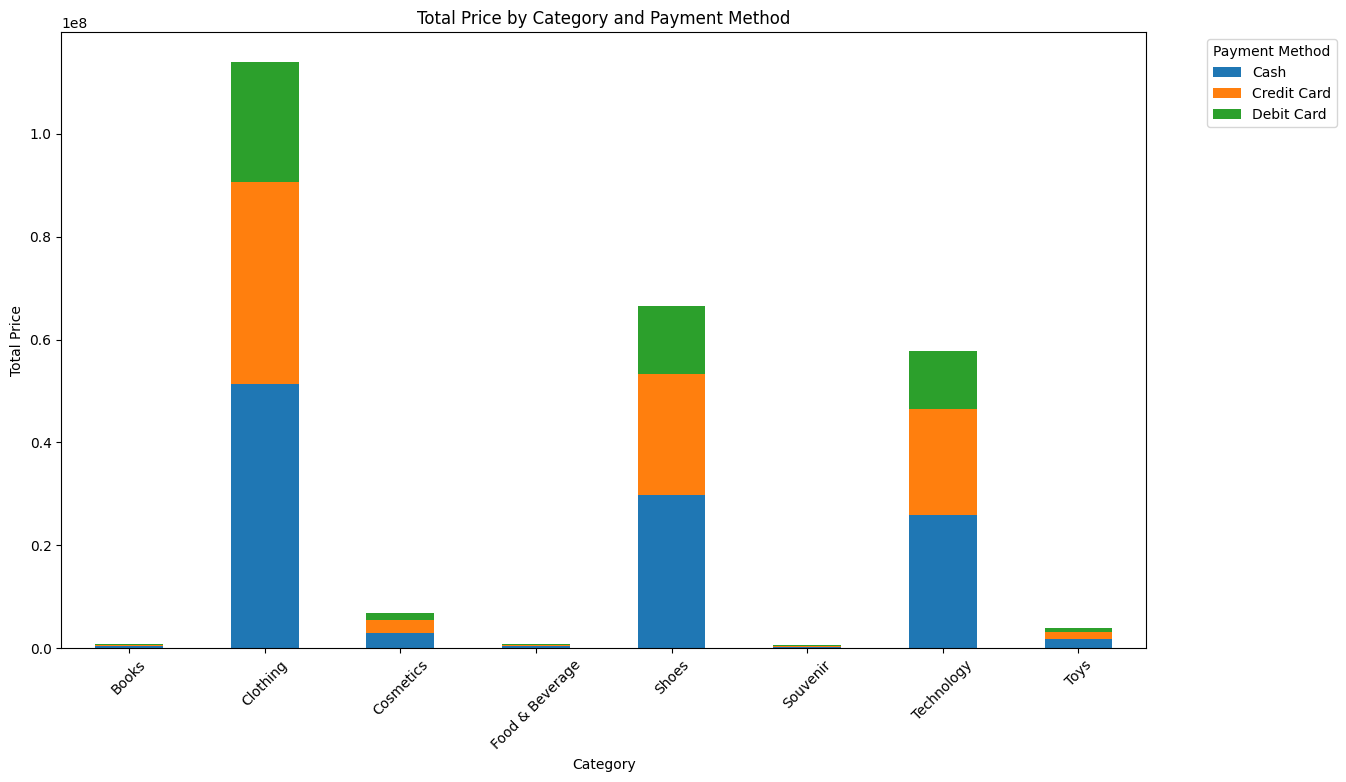

In [56]:
# Assuming 'price' and 'quantity' columns are available, calculate 'total_price'
data['total_price'] = data['price'] * data['quantity']

# Calculate the total price by category and payment method, with category on the x-axis
total_price_by_category_payment = data.groupby(['category', 'payment_method'])['total_price'].sum().unstack()

# Plotting the total price by category with payment methods as separate bars
plt.figure(figsize=(14, 8))
total_price_by_category_payment.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Price by Category and Payment Method')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

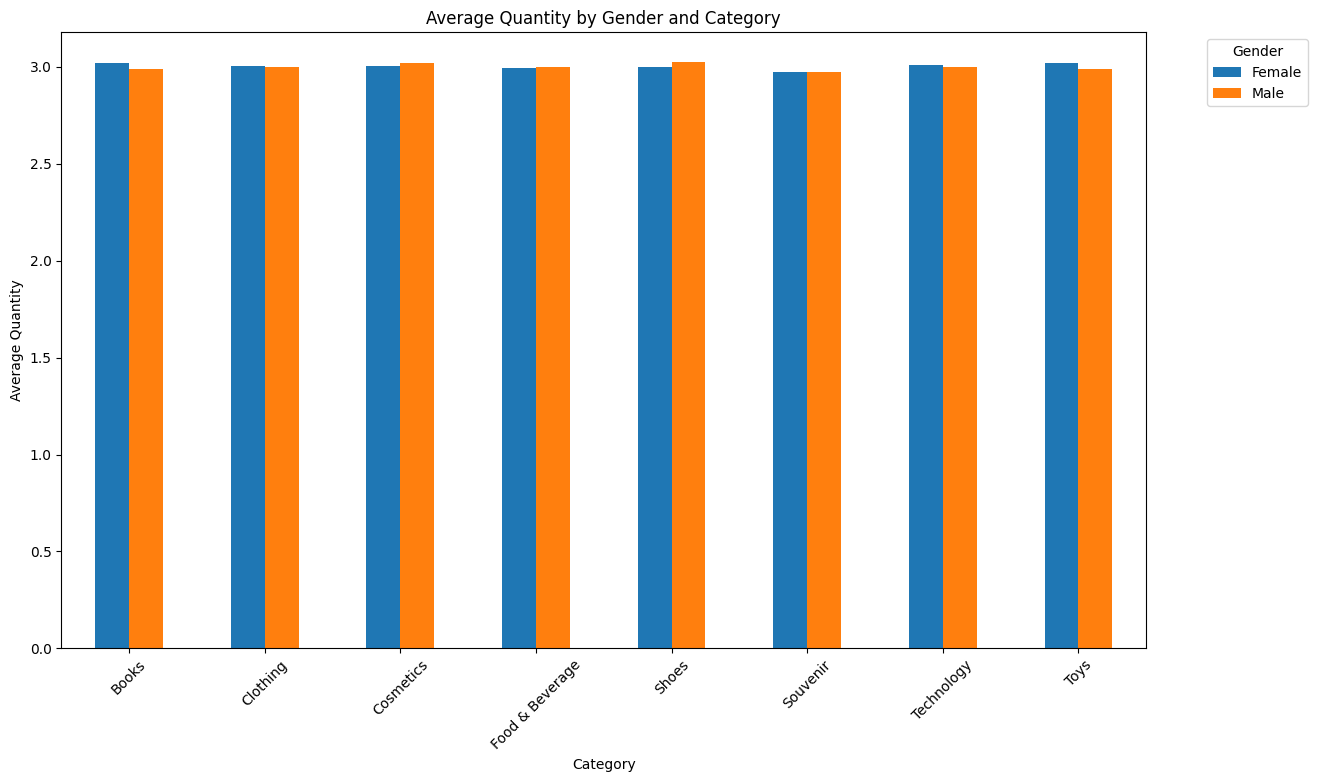

In [57]:
# Calculate the average quantity by gender and category
average_quantity_by_gender_category = data.groupby(['category', 'gender'])['quantity'].mean().unstack()

# Plotting the average quantity by category with gender as separate bars
plt.figure(figsize=(14, 8))
average_quantity_by_gender_category.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Average Quantity by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Average Quantity')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Relationship between Age and Quality by Gender**

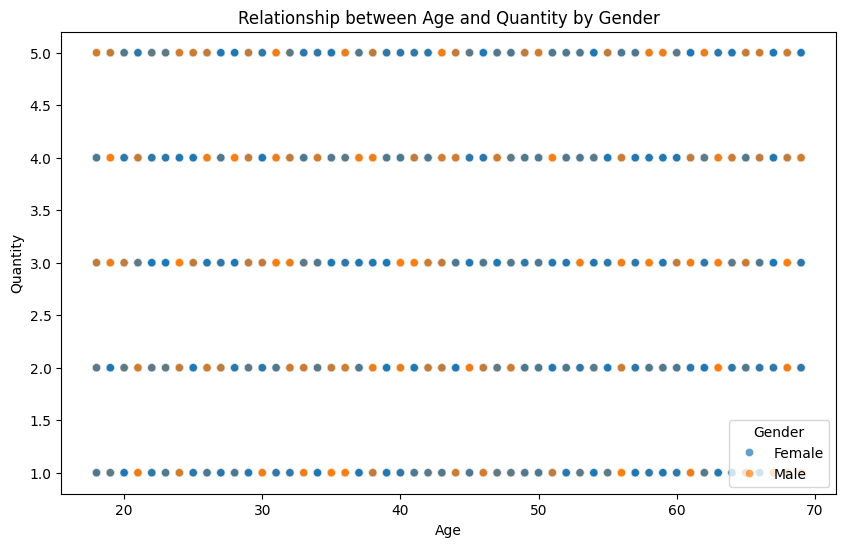

In [58]:
# Plotting the relationship between age and quantity by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='quantity', hue='gender', alpha=0.7)
plt.title('Relationship between Age and Quantity by Gender')
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.legend(title='Gender')
plt.show()

**Average Price By Payment Method And Catogary**

<Figure size 1200x600 with 0 Axes>

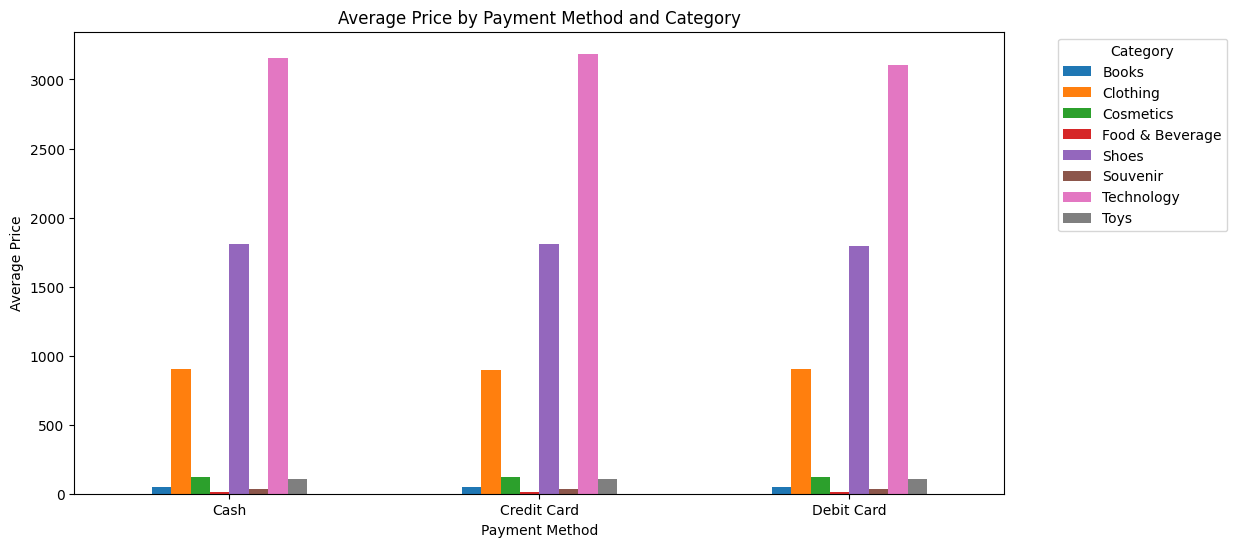

In [59]:
# Calculate the average price by payment method and category
average_price_by_payment_category = data.groupby(['payment_method', 'category'])['price'].mean().unstack()

# Plotting the average price by payment method and category
plt.figure(figsize=(12, 6))
average_price_by_payment_category.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Average Price by Payment Method and Category')
plt.xlabel('Payment Method')
plt.ylabel('Average Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Quality Distribution By Age Group And Catogary

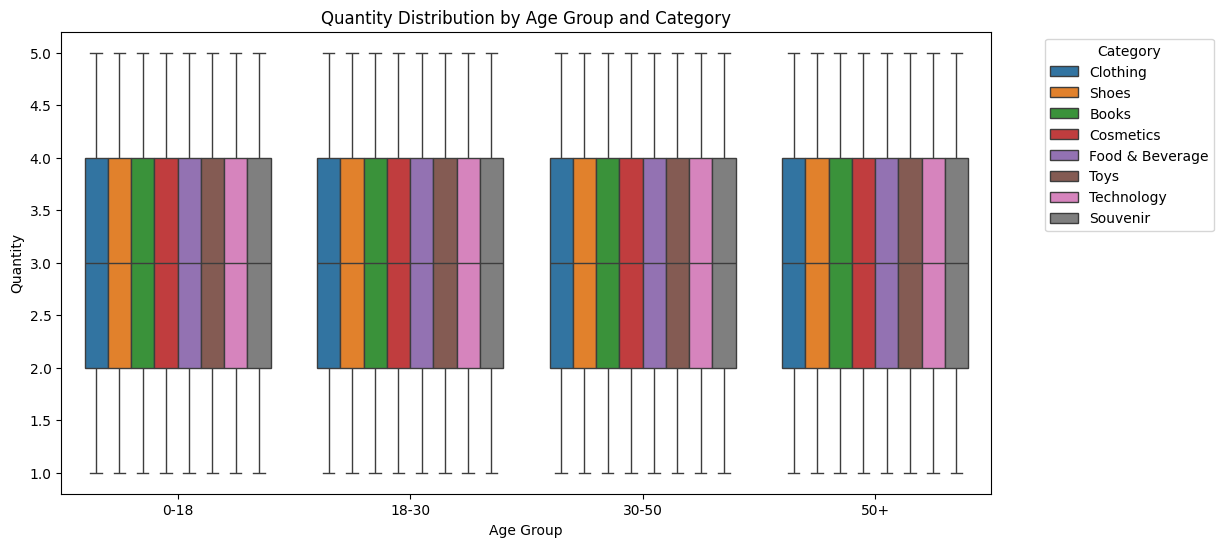

In [60]:
# Creating age groups for the analysis
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '18-30', '30-50', '50+'])

# Plotting quantity distribution by age group and category using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='age_group', y='quantity', hue='category')
plt.title('Quantity Distribution by Age Group and Category')
plt.xlabel('Age Group')
plt.ylabel('Quantity')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

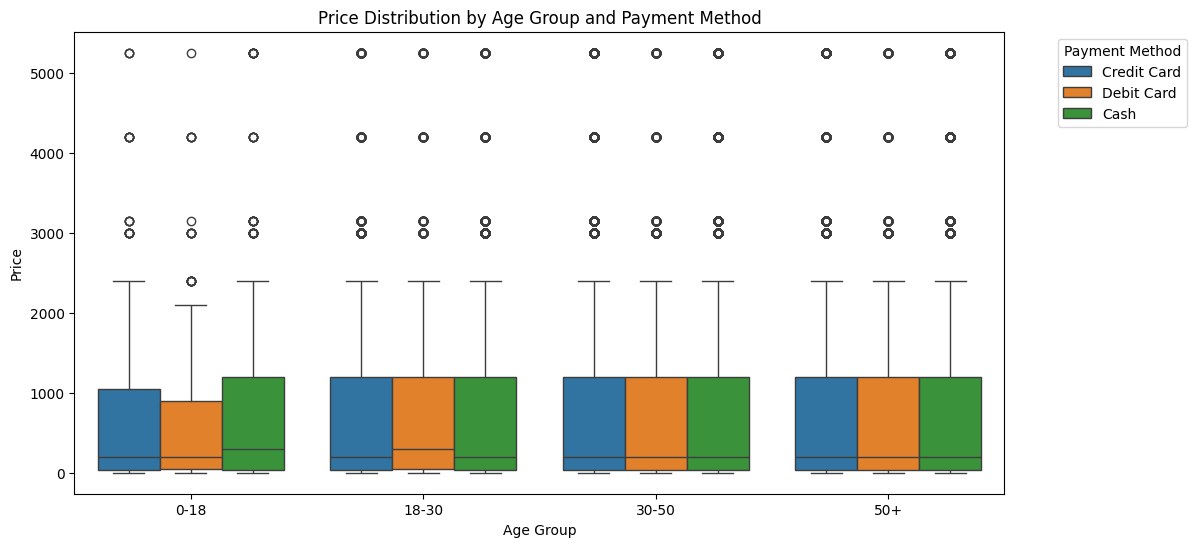

In [61]:
#Price Distribution by Age Group and Payment Method
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '18-30', '30-50', '50+'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='age_group', y='price', hue='payment_method')
plt.title('Price Distribution by Age Group and Payment Method')
plt.xlabel('Age Group')
plt.ylabel('Price')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **K Mean Clustering**

In [62]:
# Scaling the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['quantity', 'price']])

In [63]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [64]:
# Evaluate the clustering with silhouette score
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.49


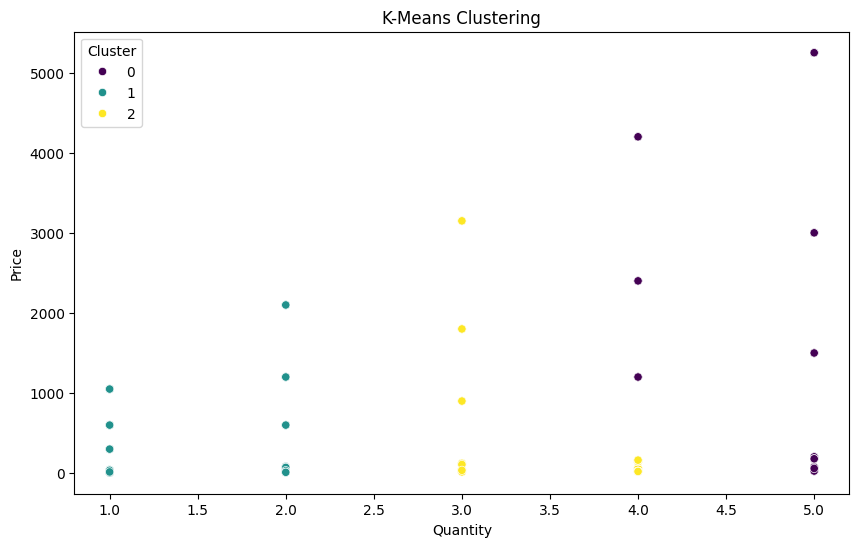

In [65]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['quantity'],
    y=data['price'],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

# **Random Forest Classifier**

In [66]:
# Prepare data for classification (e.g., predicting category)
X = data[['quantity', 'price', 'age']]  # Features
y = data['category']  # Target


In [67]:
# Encode target labels
y = y.astype('category').cat.codes


In [68]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predictions
y_pred = rf.predict(X_test)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [72]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data['category'].astype('category').cat.categories))


Classification Report:
                 precision    recall  f1-score   support

          Books       1.00      1.00      1.00      1489
       Clothing       1.00      1.00      1.00     10369
      Cosmetics       1.00      1.00      1.00      4561
Food & Beverage       1.00      1.00      1.00      4423
          Shoes       1.00      1.00      1.00      2961
       Souvenir       1.00      1.00      1.00      1505
     Technology       1.00      1.00      1.00      1474
           Toys       1.00      1.00      1.00      3056

       accuracy                           1.00     29838
      macro avg       1.00      1.00      1.00     29838
   weighted avg       1.00      1.00      1.00     29838



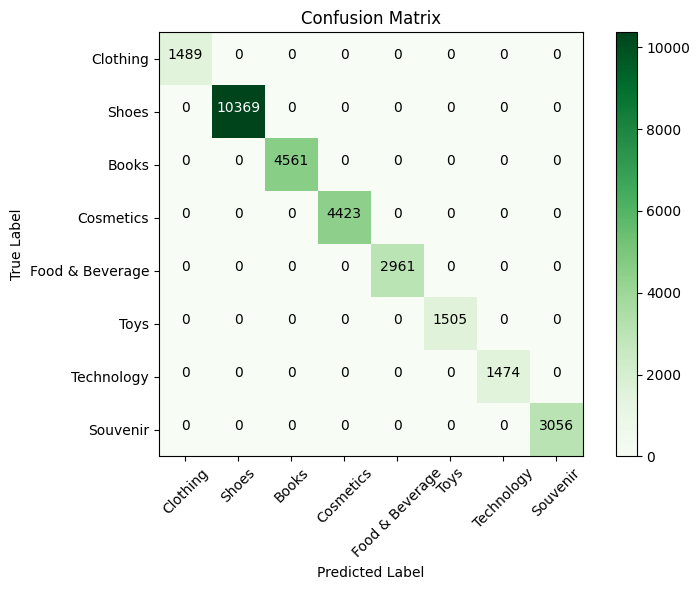

In [76]:
# Plotting the confusion matrix as a basic heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Greens')
plt.title('Confusion Matrix')
plt.colorbar()
# Add labels to the confusion matrix
classes = list(data['category'].unique())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add values to the matrix cells
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, f"{cm[i, j]}",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()